# MNIST dataset 

This notebook provides a detailed insight of the NN architecture used.

### Importing the necessary libraries

---

*   TensorFlow (v2.2)
*   Tensorflowjs
*   Matplotlib

In [1]:
import tensorflow as tf
print(tf.__version__)
import tensorflowjs as tfjs
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

### Importing the dataset

---
The MNIST dataset, often termed as the "Hello World" for Neural Networks, is available in the Keras API and can be imported easily.

In [48]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

### Data Preprocessing

---
Printing the 1st image from training set

shape of image : (28, 28)


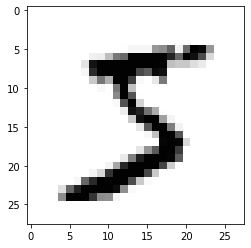

In [49]:
plt.imshow(x_train[0], cmap='Greys')
print('shape of image : ' + str(x_train[0].shape))

Checking if the output(y) is `categorical` or not.


In [50]:
print('y of 1st training example : '+str(y_train[0]))

y of 1st training example : 5


---
Since it is not `categorical`, converting them to using **keras**

In [51]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [52]:
print('y of 1st training example : '+str(y_train[0]))

y of 1st training example : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Reshaping the array to 4-dims so that it can work with the Keras API

In [53]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

The pixel values range from 0-255.

Normalising the data can increase the performance of the model.

In [54]:
x_train, x_test = x_train/255.0, x_test/255.0

Details of data

In [55]:
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
print('y_train shape:', y_train.shape)
print('Number of images in y_train', y_train.shape[0])
print('Number of images in y_test', y_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000
y_train shape: (60000, 10)
Number of images in y_train 60000
Number of images in y_test 10000


### Building the model
---

The model is architectured as:
FLATTEN -> DENSE(128) -> DENSE(60) ->DENSE(30) -> OUTPUT(10)

Fortunately, we have Keras API which can construct the computational graph in just 4-5 lines of code. More about `Sequential`, `Dense` can be found [here](https://keras.io/api/).

In [56]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28,1)),
                             tf.keras.layers.Dense(units=60, activation='relu'),
                             tf.keras.layers.Dense(units=30, activation='relu'),
                             tf.keras.layers.Dense(units=10, activation='softmax')
                            ])

Summary of model

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 60)                47100     
_________________________________________________________________
dense_4 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                310       
Total params: 49,240
Trainable params: 49,240
Non-trainable params: 0
_________________________________________________________________


Compiling the model with `Adam` optimizer and `Categorical cross entropy` as the loss function. 

The loss function describes how bad the model is and optimizer is responsible for improving the model.

In [58]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Training the model on `x_train`, `y_train` for 10 epochs

In [59]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3042 - accuracy: 0.9105 - val_loss: 0.1591 - val_accuracy: 0.9529
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1425 - accuracy: 0.9583 - val_loss: 0.1193 - val_accuracy: 0.9644
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1058 - accuracy: 0.9686 - val_loss: 0.1158 - val_accuracy: 0.9655
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0842 - accuracy: 0.9742 - val_loss: 0.1028 - val_accuracy: 0.9692
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0695 - accuracy: 0.9786 - val_loss: 0.1022 - val_accuracy: 0.9694
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0587 - accuracy: 0.9818 - val_loss: 0.0990 - val_accuracy: 0.9697
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0518 - accuracy: 0.9837 - val_loss: 0.1025 - val_accuracy:

Evaluating the model with `x_test` and `y_test`

In [60]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1014 - accuracy: 0.9732


[0.10137195885181427, 0.9732000231742859]

Trying the output with random test example

9


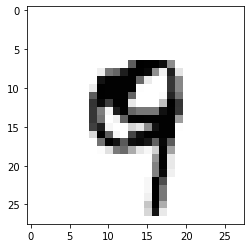

In [61]:
plt.imshow(x_test[4444].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[4444].reshape(1,28,28,1))
print(pred.argmax())

In [62]:
tfjs.converters.save_keras_model(model, 'models')

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:122: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
